In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
# sns.set_context(context="poster")
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA

In [2]:
 df=pd.read_csv("./data/HR.csv")

In [3]:
df = df.dropna(how="any", axis=0)
df = df[df["last_evaluation"] <= 1][df["salary"] != "nme"][df["department"] != "sale"]


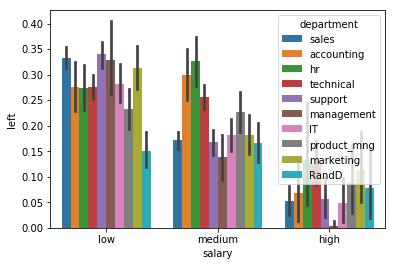

In [4]:
sns.barplot(x="salary", y="left", hue="department", data=df)


## 连续值之间通过相关系数

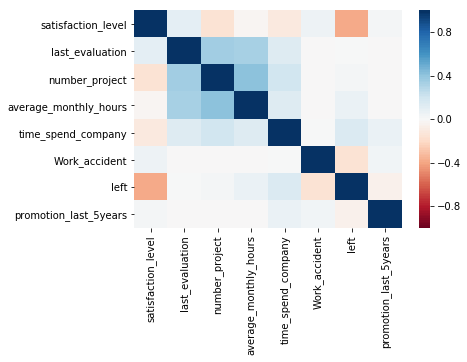

In [5]:
# sns.heatmap(df.corr())
sns.heatmap(df.corr(), vmax=1, vmin=-1,cmap=sns.color_palette("RdBu",n_colors=128))

## 使用PCA降维之后

[9.98565340e-01 8.69246970e-04 4.73865973e-04 4.96932182e-05
 2.43172315e-05 9.29496619e-06 8.24128218e-06]


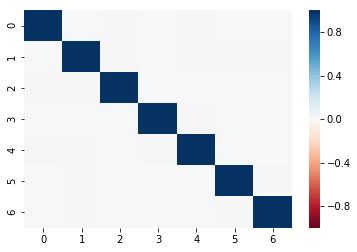

In [6]:
my_pca=PCA(n_components=7)
lower_mat=my_pca.fit_transform(df.drop(labels=["salary","department","left"],axis=1).values)
print(my_pca.explained_variance_ratio_)
sns.heatmap(pd.DataFrame(lower_mat).corr(),vmax=1, vmin=-1,cmap=sns.color_palette("RdBu",n_colors=128))
plt.show()



## 离散相关分析，可以使用熵

In [7]:
s1 = pd.Series(["X1", "X1", "X2", "X2", "X2", "X2"])
s2 = pd.Series(["Y1", "Y1", "Y1", "Y2", "Y2", "Y2"])

### 熵

In [8]:
def getEntropy(s):
    if not isinstance(s, pd.core.series.Series):
        s = pd.Series(s)
    prt_ary = np.array(s.groupby(s).count().values) / float(len(s))
    return -(np.log2(prt_ary) * prt_ary).sum()

In [9]:
print(getEntropy(s1))
print(getEntropy(s2))



0.9182958340544896
1.0


### 条件熵

In [12]:
def getCondEntropy(a1, a2):
    assert (len(a1) == len(a2))
    d = dict()
    for i in list(range(len(a1))):
        d[a1[i]] = d.get(a1[i], []) + [a2[i]]
#     print(d)
    return sum([getEntropy(d[k]) * len(d[k]) / float(len(a1)) for k in d])

print(getCondEntropy(s1,s2))
print(getCondEntropy(s2,s1))


{'X1': ['Y1', 'Y1'], 'X2': ['Y1', 'Y2', 'Y2', 'Y2']}
0.5408520829727552
{'Y1': ['X1', 'X1', 'X2'], 'Y2': ['X2', 'X2', 'X2']}
0.4591479170272448


### 熵增益

In [14]:
def getEntropyGain(a1, a2):
    return getEntropy(a2) - getCondEntropy(a1, a2)

In [16]:
print(getEntropyGain(s1, s2))
print(getEntropyGain(s2, s1))

{'X1': ['Y1', 'Y1'], 'X2': ['Y1', 'Y2', 'Y2', 'Y2']}
0.4591479170272448
{'Y1': ['X1', 'X1', 'X2'], 'Y2': ['X2', 'X2', 'X2']}
0.4591479170272448


### 熵增益率

In [17]:
def getEntropyGainRatio(a1, a2):
    return getEntropyGain(a1, a2) / getEntropy(a2)

In [18]:
print(getEntropyGainRatio(s1, s2))
print(getEntropyGainRatio(s2, s1))

{'X1': ['Y1', 'Y1'], 'X2': ['Y1', 'Y2', 'Y2', 'Y2']}
0.4591479170272448
{'Y1': ['X1', 'X1', 'X2'], 'Y2': ['X2', 'X2', 'X2']}
0.5


### 相关性

In [19]:
def getDiscreteRelation(a1, a2):
    return getEntropyGain(a1, a2) / math.sqrt(getEntropy(a1) * getEntropy(a2))

In [20]:
print(getDiscreteRelation(s1, s2))
print(getDiscreteRelation(s2, s1))

{'X1': ['Y1', 'Y1'], 'X2': ['Y1', 'Y2', 'Y2', 'Y2']}
0.4791387674918639
{'Y1': ['X1', 'X1', 'X2'], 'Y2': ['X2', 'X2', 'X2']}
0.4791387674918639


## GINI系数

### 可能性平方和

In [24]:
def getProbSS(s):
    if not isinstance(s,pd.core.series.Series):
        s = pd.Series(s)
    prt_ary = np.array(s.groupby(s).count().values / float(len(s)))
    return sum(prt_ary ** 2)

### Gini

In [25]:
def getGini(a1, a2):
    assert (len(a1) == len(a2))
    d = dict()
    for i in list(range(len(a1))):
        d[a1[i]] = d.get(a1[i], []) + [a2[i]]
    return 1 - sum([getProbSS(d[k]) * len(d[k]) / float(len(a1)) for k in d])

In [26]:
print(getGini(s1, s2))

0.25
